In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df = pd.read_excel("C:/Users/salma elyagoubi/Downloads/E Commerce Dataset.xlsx", sheet_name="E Comm")

## Data Exploration

In [8]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [9]:
df.shape

(5630, 20)

In [10]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [11]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [15]:
df.drop(columns="CustomerID", inplace=True)

## EDA

In [16]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [17]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)        

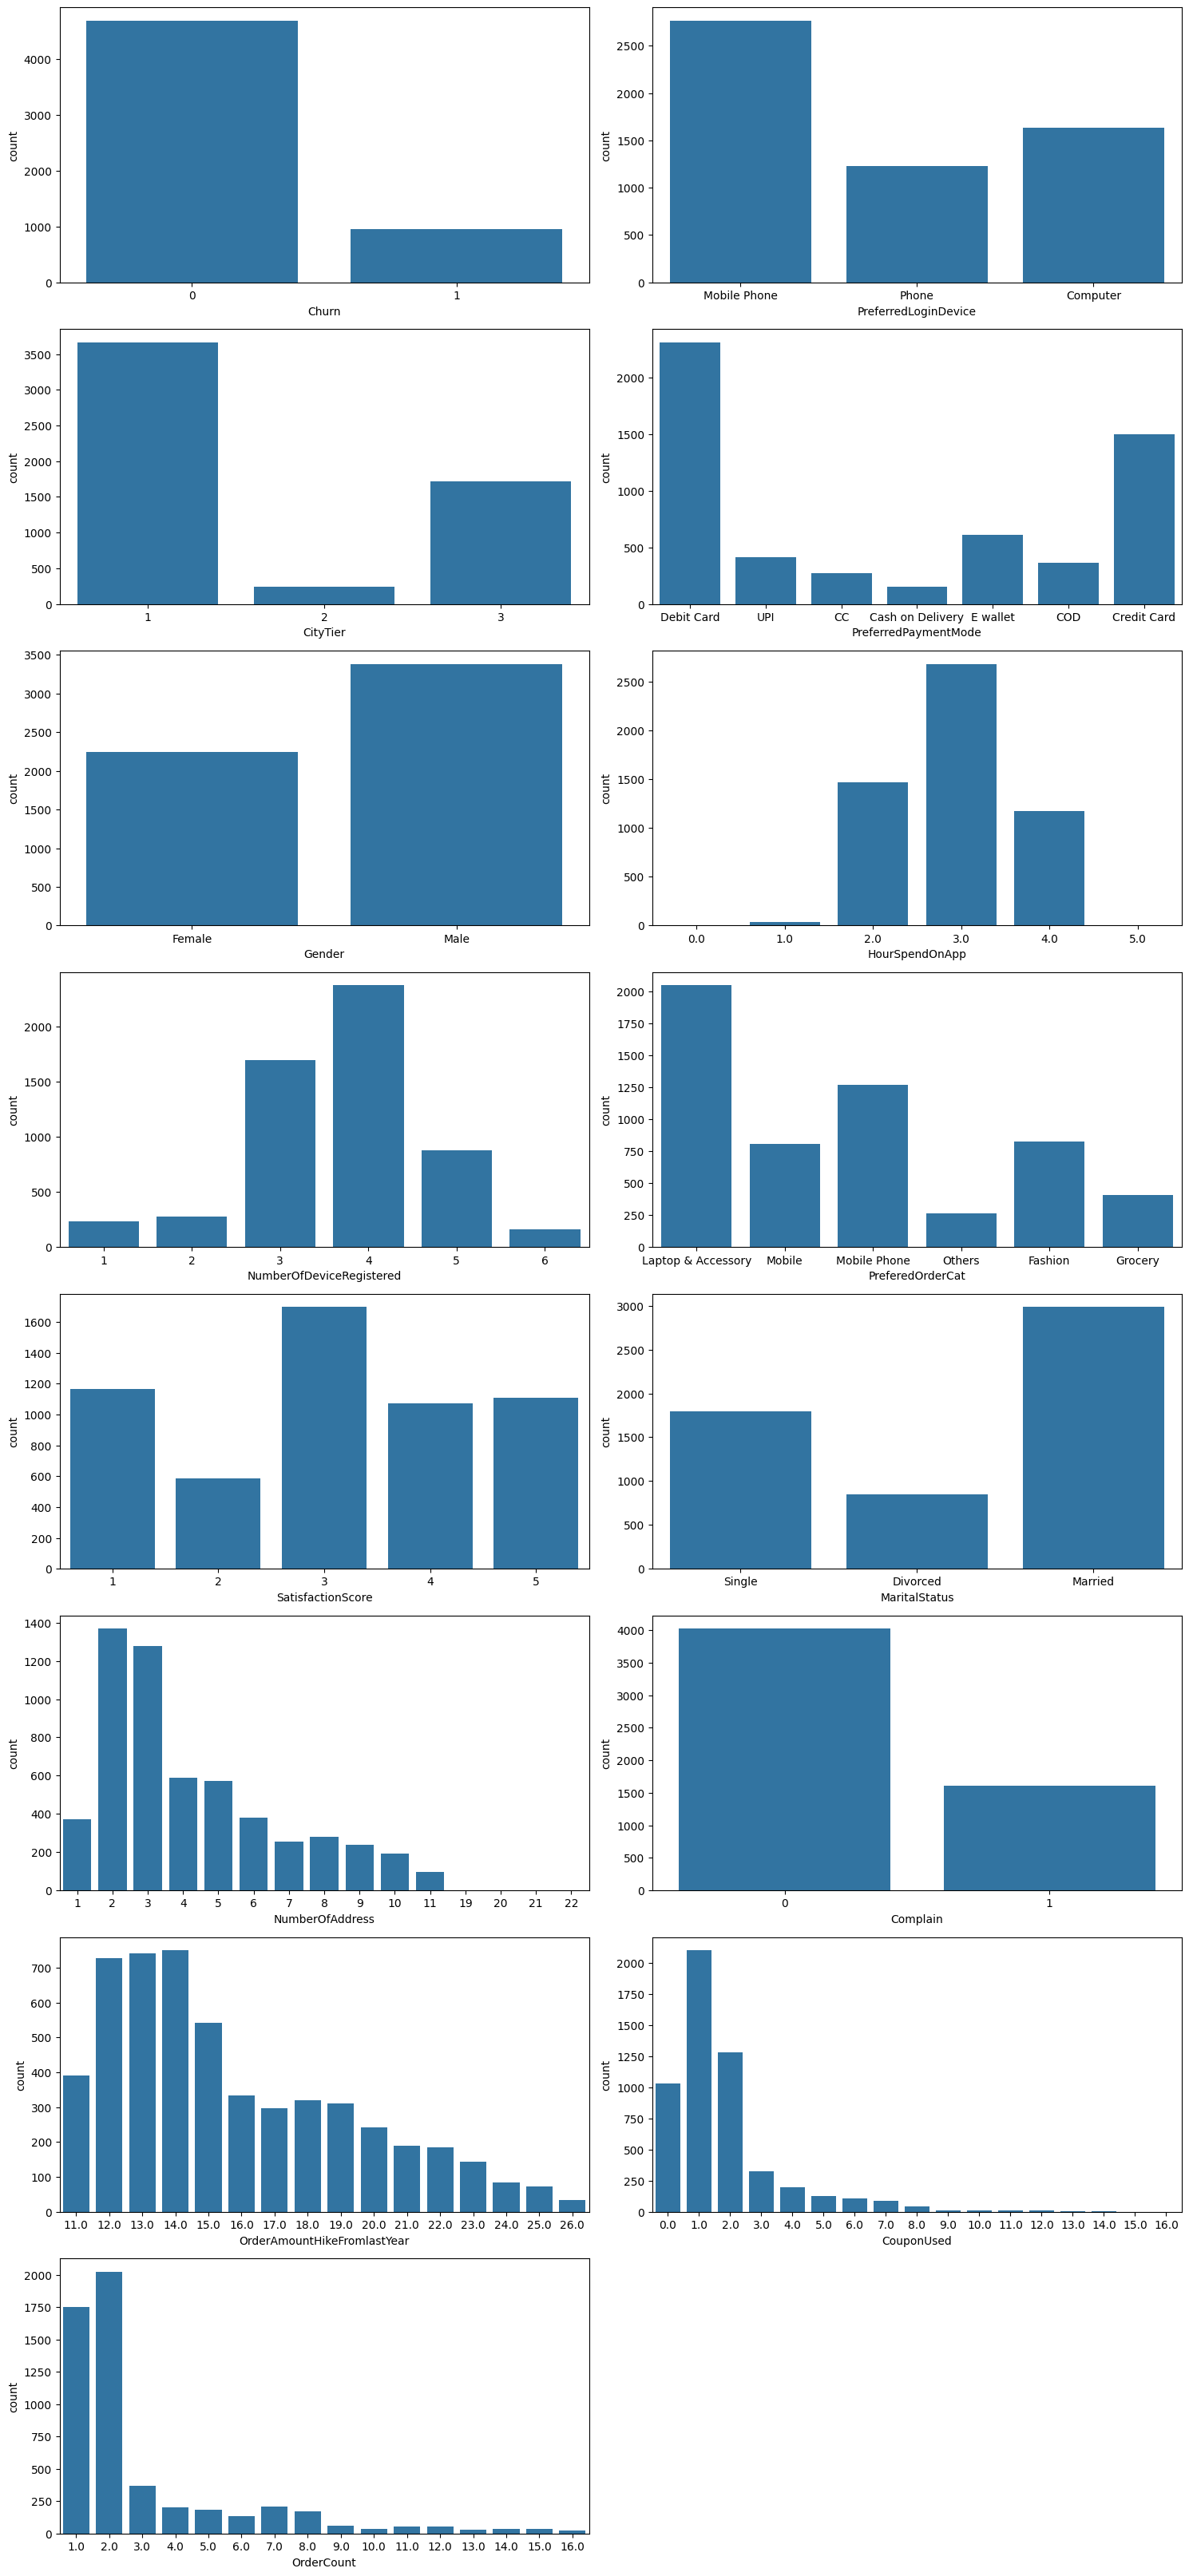

In [18]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

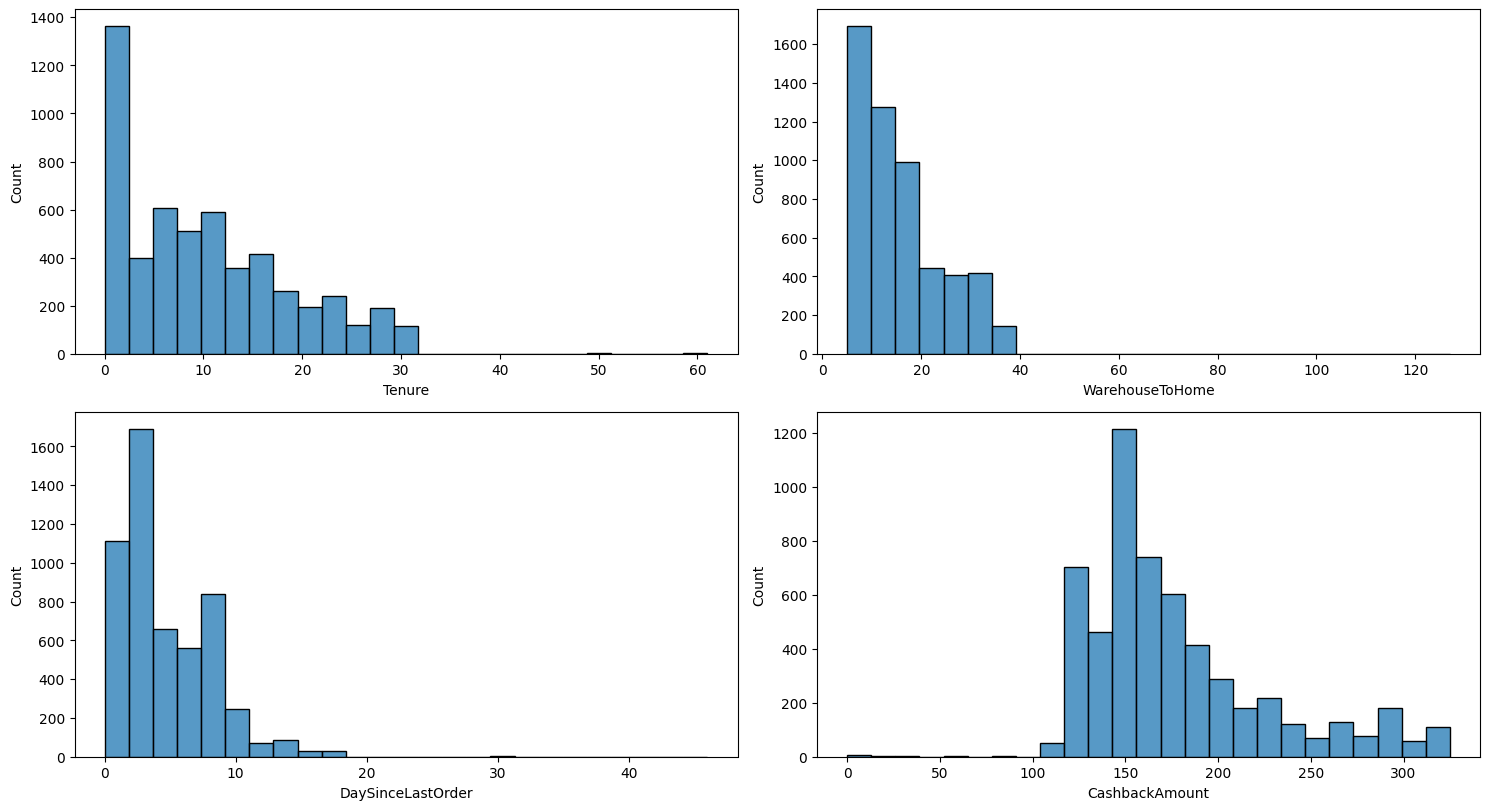

In [19]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

- We can see that maximum customer Tenure is from 0 to 15

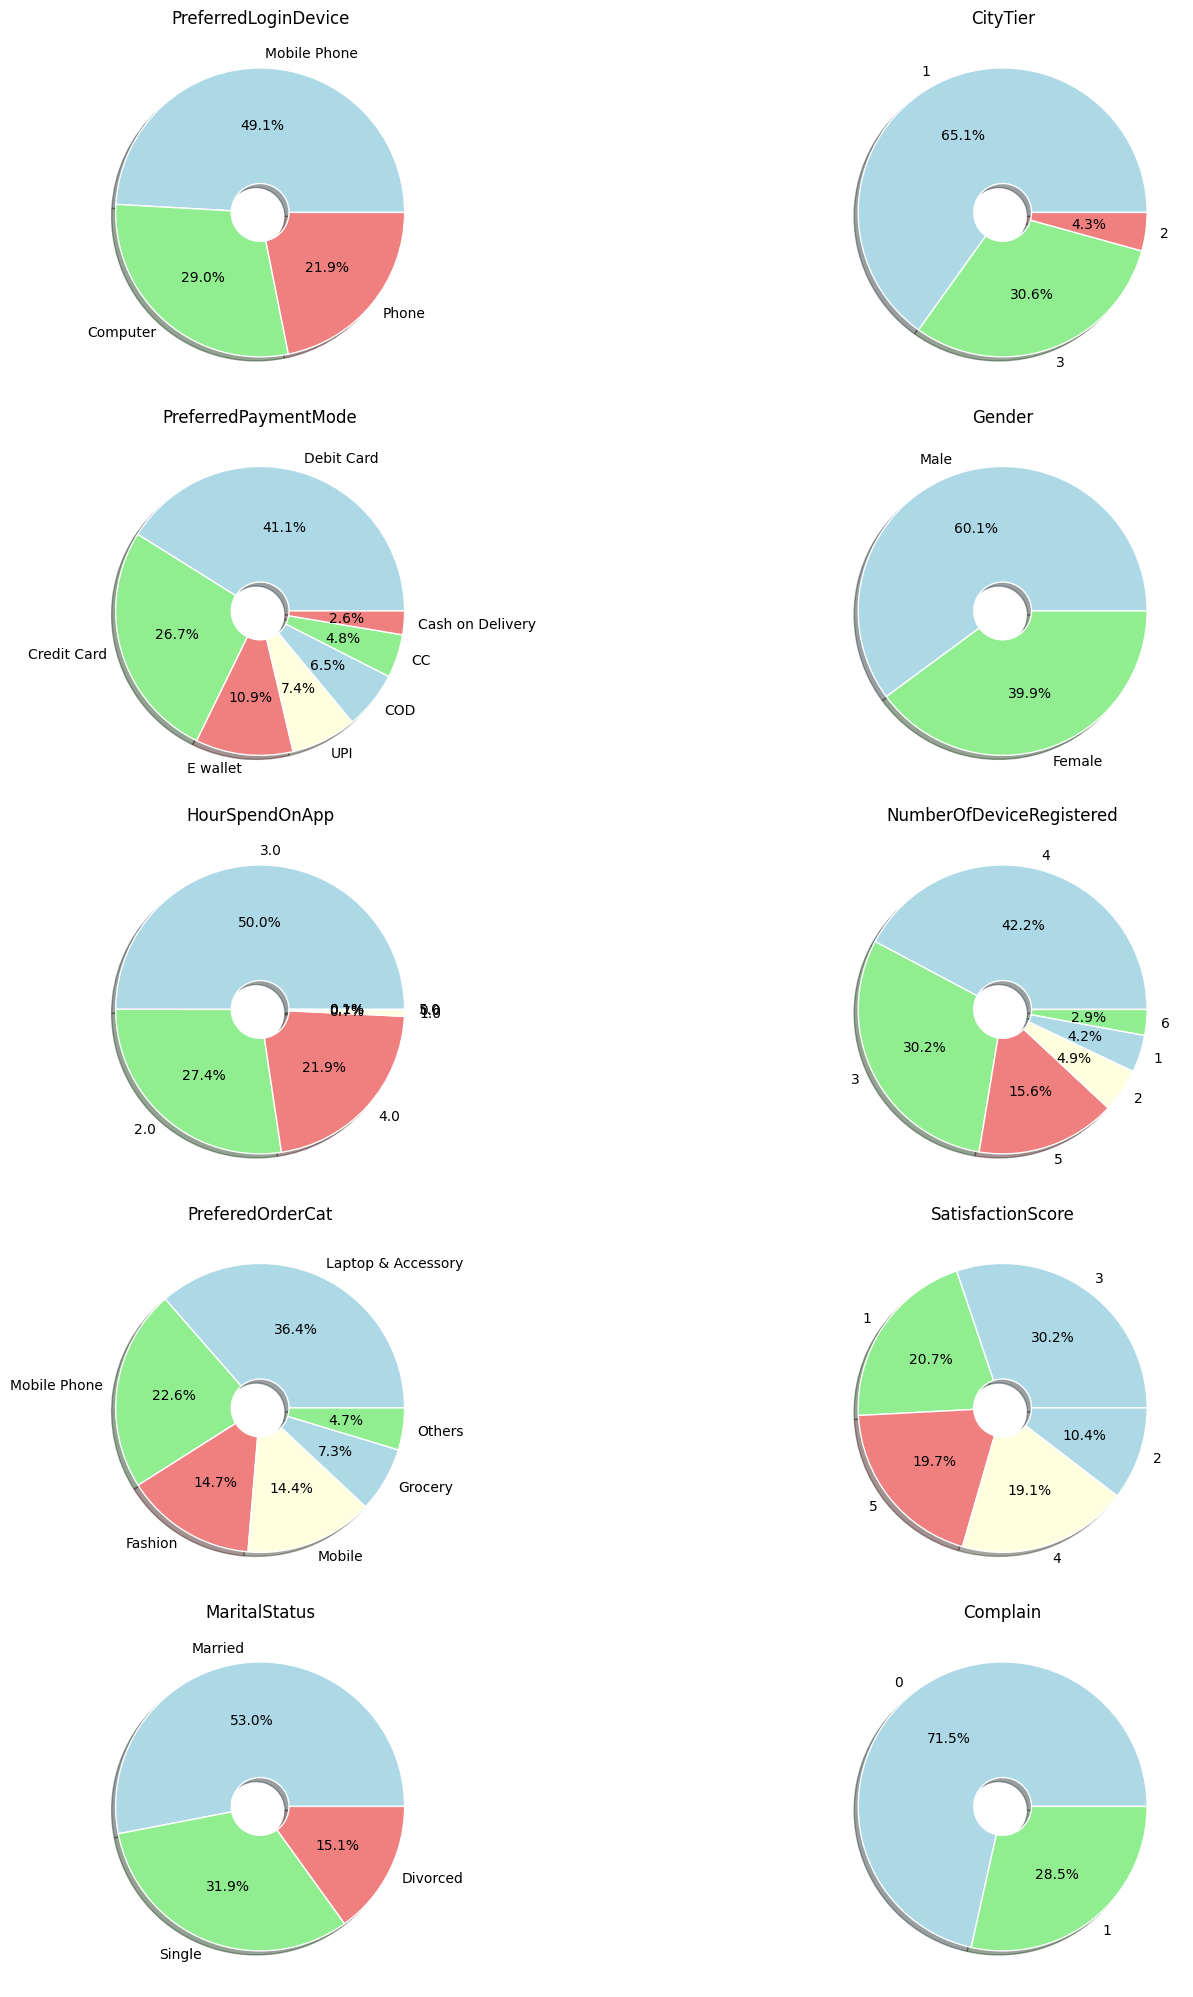

In [20]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        plt.pie(data=df, x=df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.1f%%',
               colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'],wedgeprops=dict(width=0.8,edgecolor="w") )
        plt.title(col)
        plot_num += 1
        plt.tight_layout()

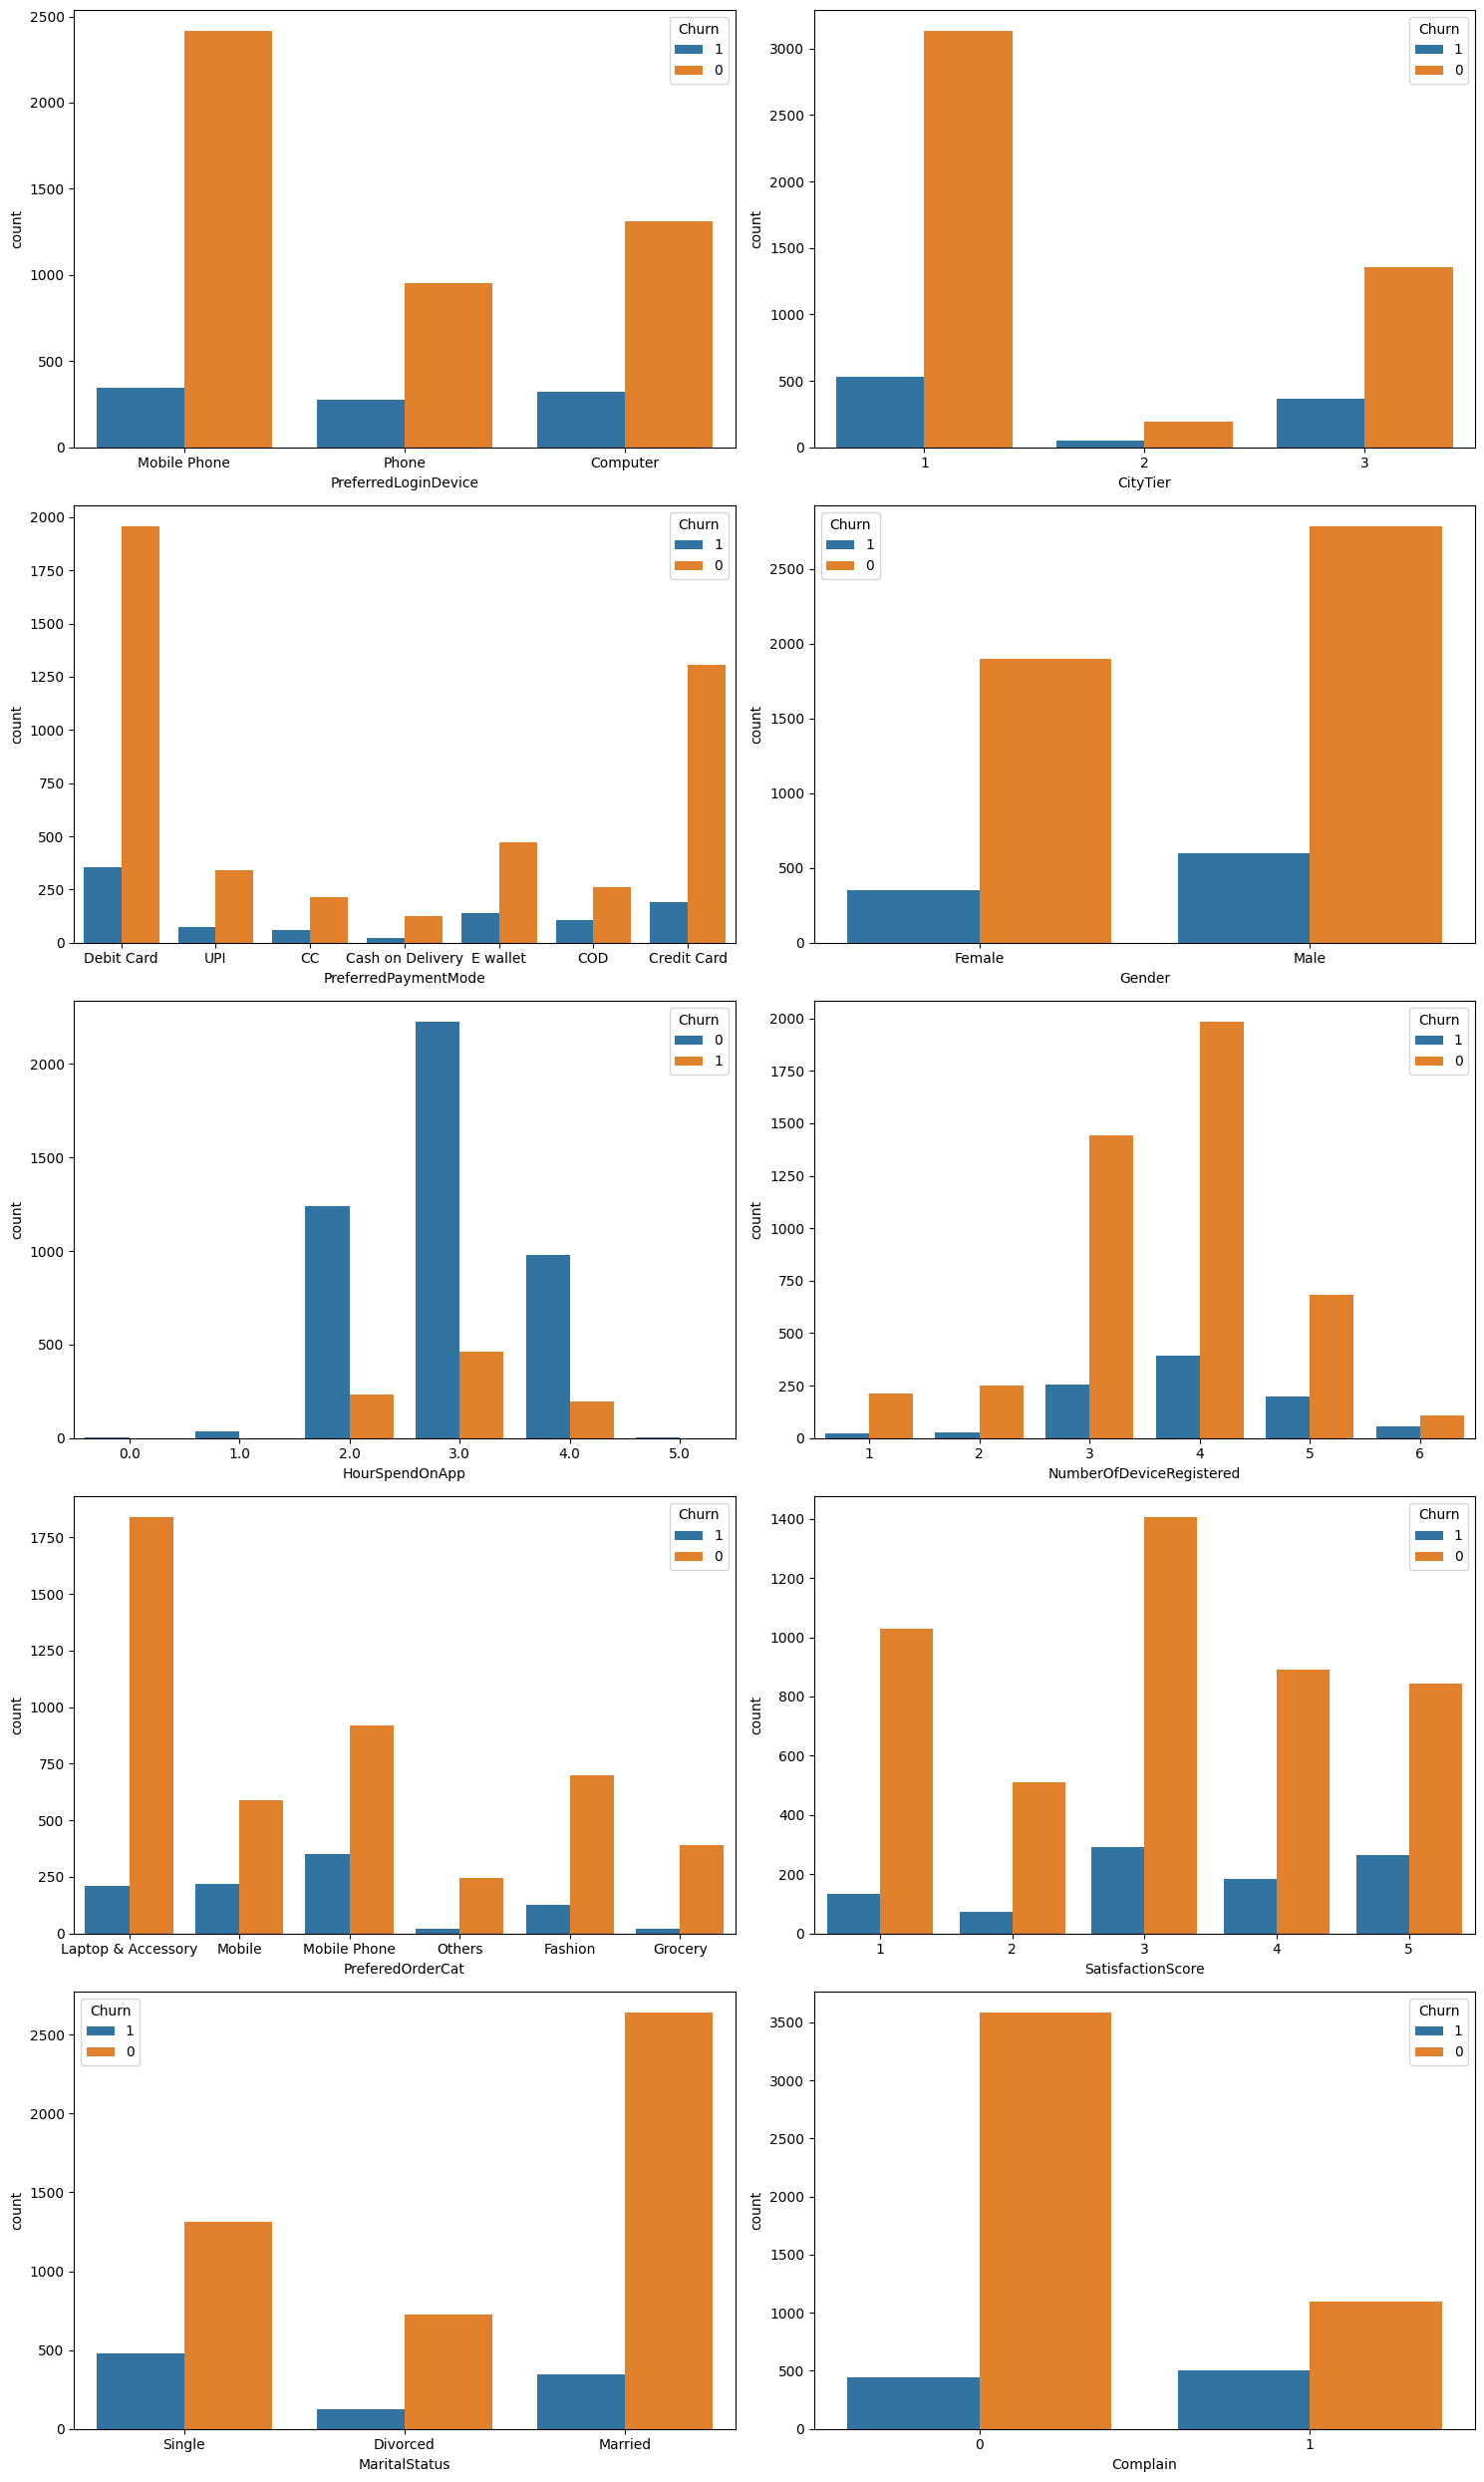

In [21]:
df_clone = df.copy()
df_clone['Churn'] = df_clone['Churn'].astype(str)

plot_cols = [col for col in count_col if df_clone[col].nunique() <= 8 and col != "Churn"]
num_plots = len(plot_cols)
num_rows = (num_plots + 1) // 2

plt.figure(figsize=(15, 5 * num_rows)) 
plot_num = 1

for col in plot_cols:
    plt.subplot(num_rows, 2, plot_num) 
    sns.countplot(data=df_clone, x=col, hue='Churn')
    plt.tight_layout()
    plot_num += 1

plt.show()

In [22]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


<Axes: xlabel='CashbackAmount'>

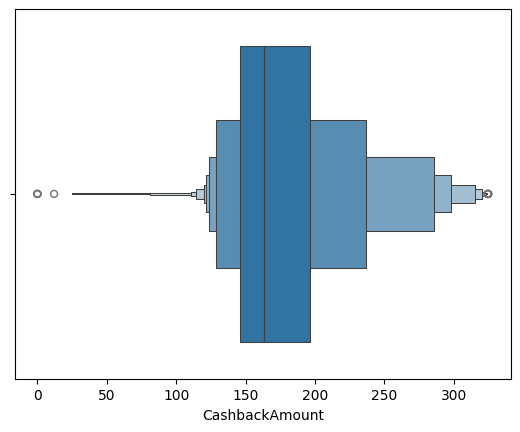

In [23]:
sns.boxenplot(data=df,x="CashbackAmount")

In [24]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [25]:
cat_df = df.select_dtypes(include="O")

In [26]:
categorical_cols = cat_df.columns
categorical_cols

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [27]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [28]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [29]:
cat_col = X.select_dtypes(include="O").columns
num_col = []
for col in X.columns:
    if col not in cat_col:
        num_col.append(col)

In [30]:
categorical_col = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('encoding',OneHotEncoder())
])

In [31]:
numerical_col = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="mean")),
    ('scaler',StandardScaler())
])

In [32]:
transformer = ColumnTransformer(transformers=[
    ('categorical_col', categorical_col, cat_col),    
    ('numerical_col', numerical_col, num_col)
])

In [33]:
classifier = XGBClassifier()

In [34]:
model = Pipeline([
    ('transformer',transformer),
    ('classifier',classifier)
])

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [36]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('numerical_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImpu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)*100

96.74363528715216

In [39]:
param_grid = {
    'classifier__n_estimators': [350],
    'classifier__learning_rate': [0.09],
    'classifier__max_depth': [25],
    'classifier__min_child_weight': [1],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [1.0],
    'classifier__lambda': [1]
}

In [40]:
grid_cv = GridSearchCV(model,param_grid, scoring='accuracy', cv=5, verbose =1, n_jobs=-1)

In [41]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('categorical_col',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoding',
                                                                                          OneHotEncoder())]),
                                                                         Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                                        ('numerical_col',
                                                                         Pipeline(...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [1.0],
                         'classifier__lambda': [1],
                         'classifier__learning_rate': [0.09],
                         'classifier__max_depth': [25],
                         'classifier__min_child_weight': [1],
                         'classifier__n_estimators': [350],
                         'classifier__subsample': [0.9]},
             scoring='accuracy', verbose=1)

In [42]:
grid_cv.best_params_

{'classifier__colsample_bytree': 1.0,
 'classifier__lambda': 1,
 'classifier__learning_rate': 0.09,
 'classifier__max_depth': 25,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 350,
 'classifier__subsample': 0.9}

In [43]:
y_pred = grid_cv.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)*100

96.80284191829485

Accuracy: 0.9680284191829485
Precision: 0.9107806691449815
Recall: 0.8909090909090909
F1 Score: 0.9007352941176471
Confusion Matrix:
[[1390   24]
 [  30  245]]


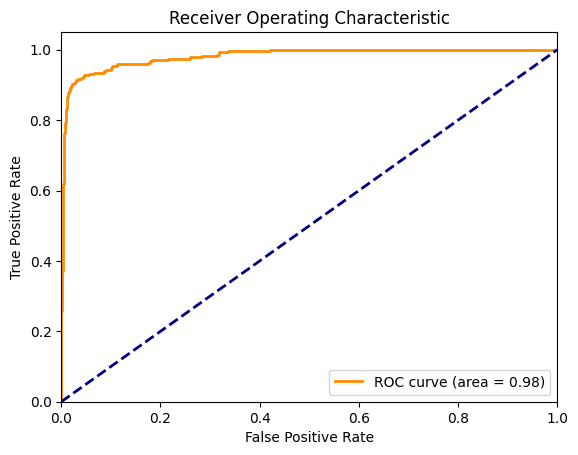

Specificity: 0.983026874115983


In [45]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print basic metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Specificity (True Negative Rate)
tn = cm[0, 0]
fp = cm[0, 1]
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

In [46]:
def get_feature_names(column_transformer):
    feature_names = []
    for transformer in column_transformer.transformers_:
        transformer_name, transformer_obj, columns = transformer
        if hasattr(transformer_obj, 'get_feature_names_out'):
            if transformer_name != 'remainder':
                names = transformer_obj.get_feature_names_out(columns)
                feature_names.extend(names)
        else:
            feature_names.extend(columns)
    
    return feature_names

preprocessed_feature_names = get_feature_names(transformer)

In [47]:
import shap

In [48]:
explainer = shap.TreeExplainer(model.named_steps['classifier'])
X_test_preprocessed = model.named_steps['transformer'].transform(X_test)

In [49]:
shap_values = explainer.shap_values(X_test_preprocessed)
shap.initjs()

### Visualize Explanations for a Specific Data Point

In [ ]:
instance_index = 0 
shap.force_plot(
    explainer.expected_value, shap_values[instance_index,:], X_test_preprocessed[instance_index,:],
    feature_names="tenure"
)


### Visualize explanations for all points of your data set at once

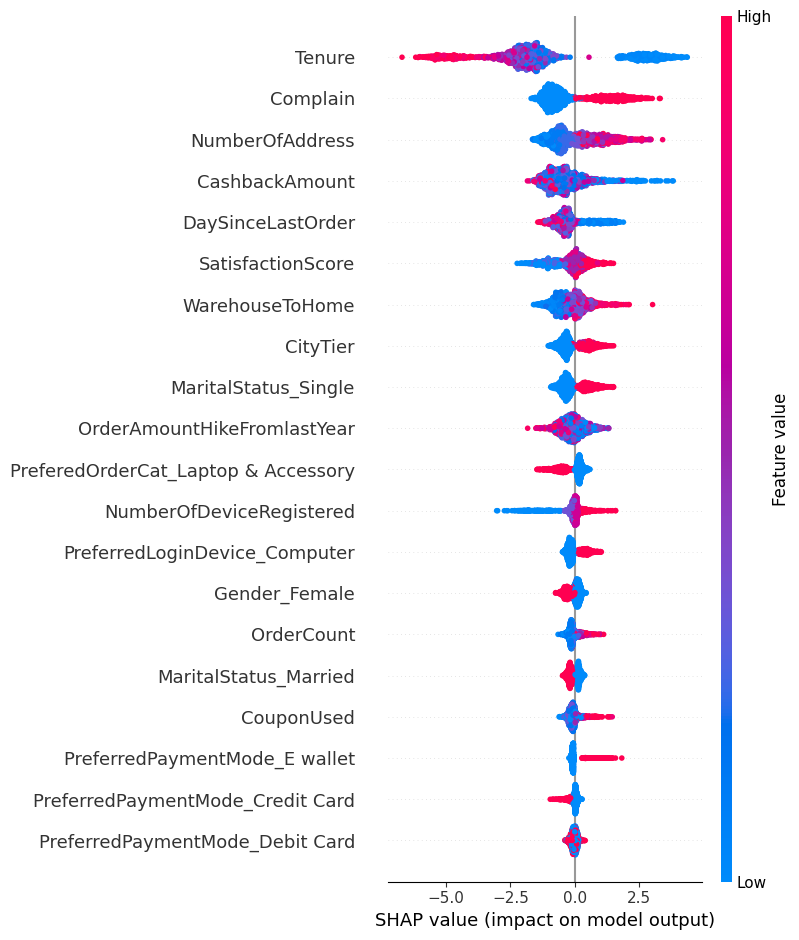

In [ ]:
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessed_feature_names)


### Visualize a summary plot for each class on the whole dataset.

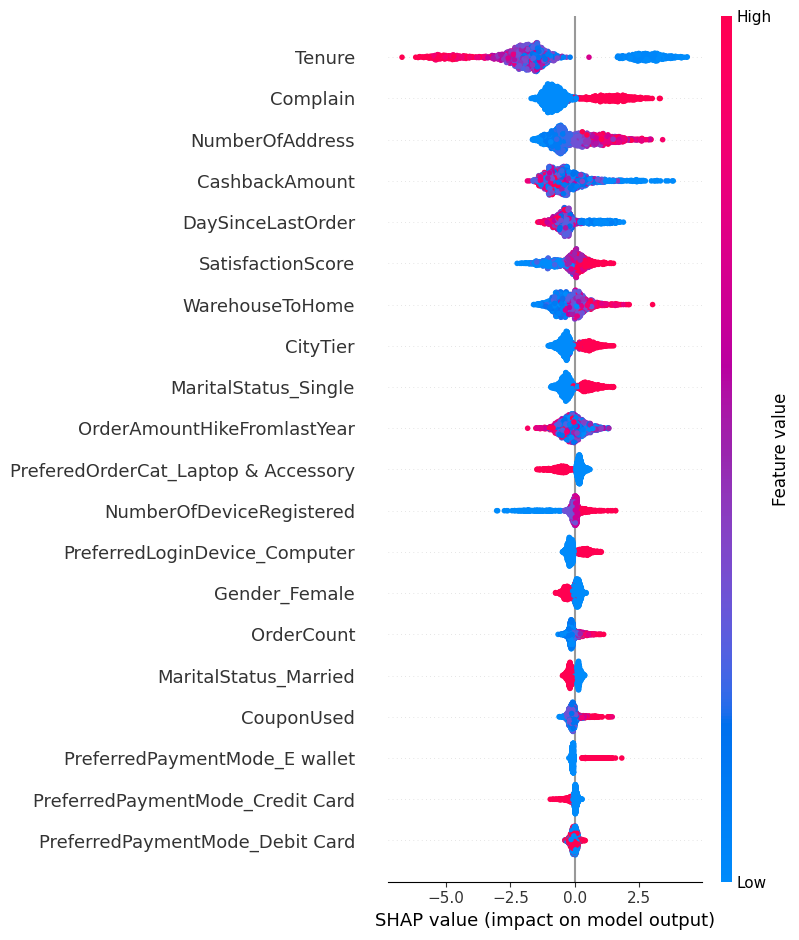

In [ ]:

shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessed_feature_names)


#### Waterfall Plot for a Specific Data Point

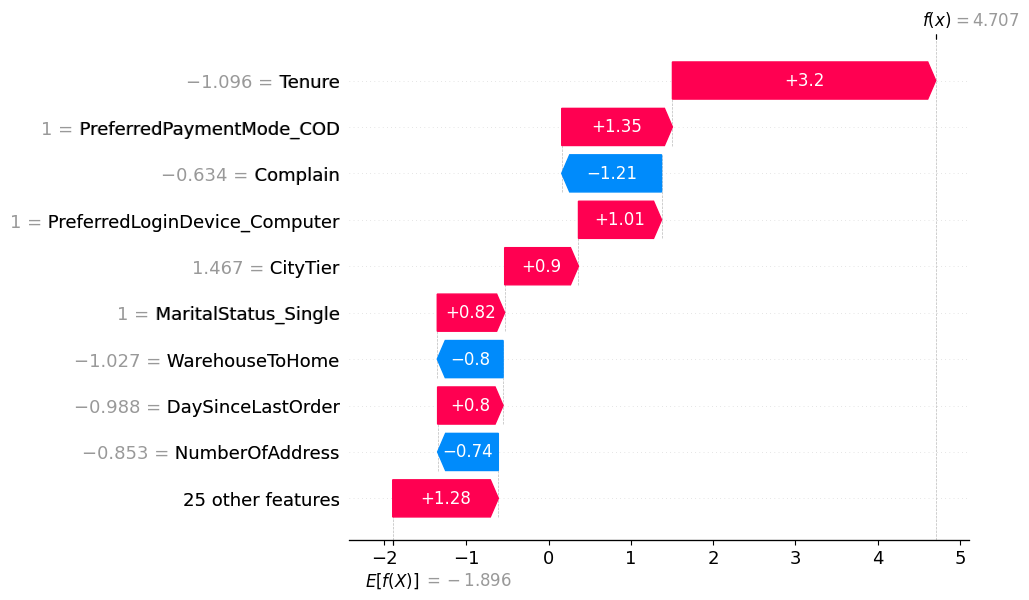

In [ ]:
instance_index = 0 

shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index],
                                     base_values=explainer.expected_value,
                                     data=X_test_preprocessed[instance_index],
                                     feature_names=preprocessed_feature_names))


####  Force Plot for a Specific Data Point

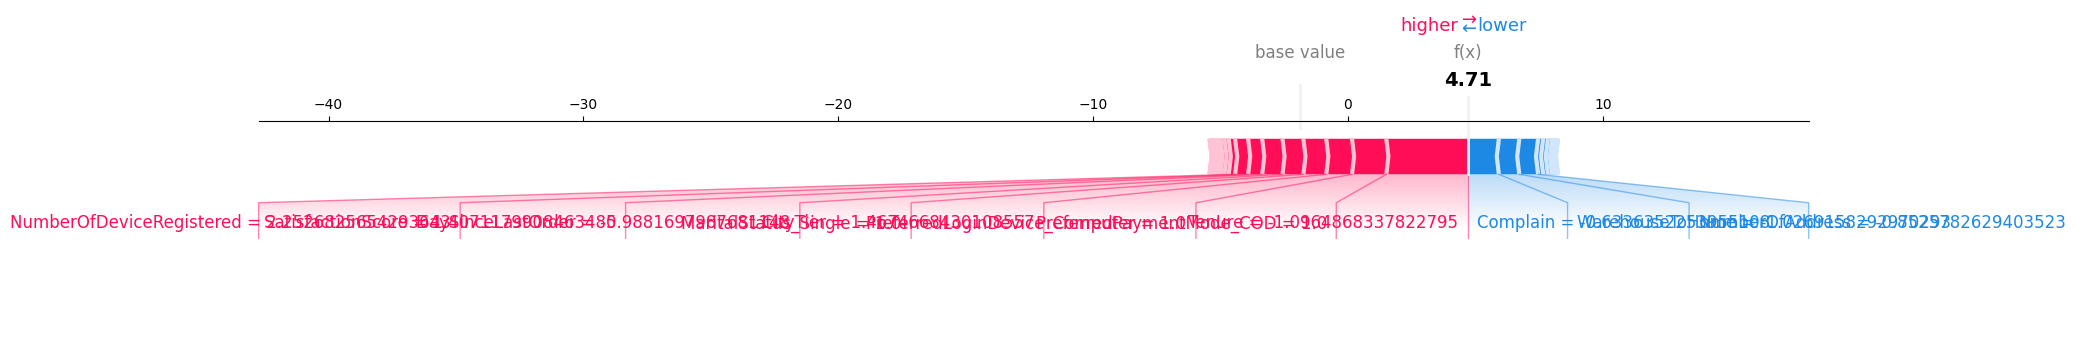

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test_preprocessed[instance_index],
                feature_names=preprocessed_feature_names, matplotlib=True)

#### Mean SHAP Plot (Summary Plot)

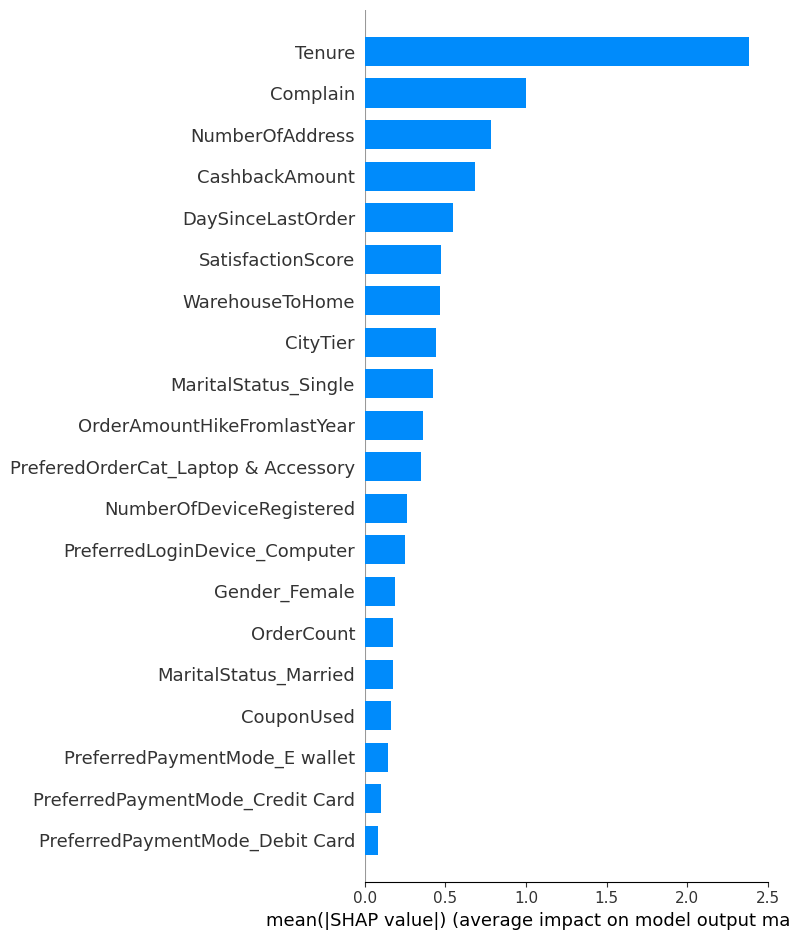

In [ ]:
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessed_feature_names, plot_type="bar")

#### Beeswarm Plot

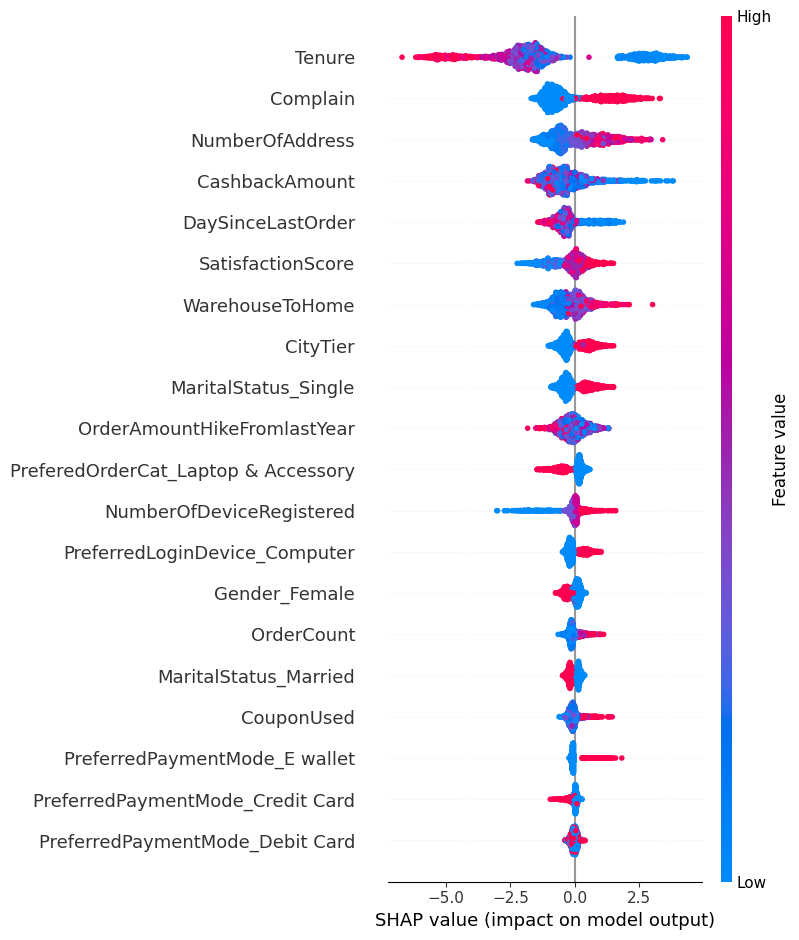

In [ ]:
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=preprocessed_feature_names)

#### Dependence Plots

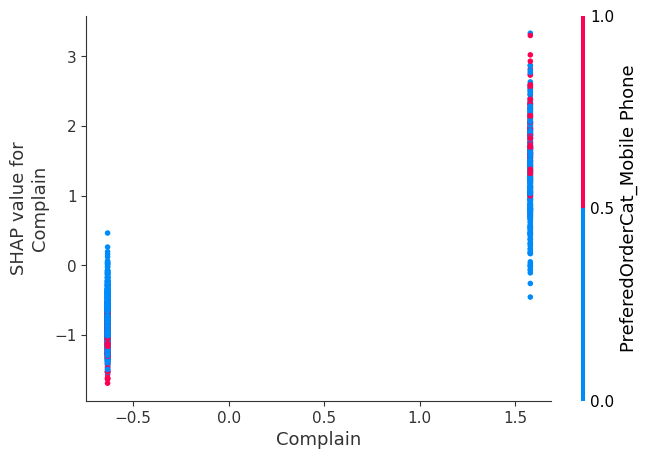

In [ ]:
feature_to_plot = 'Complain'
shap.dependence_plot(feature_to_plot, shap_values, X_test_preprocessed, feature_names=preprocessed_feature_names)
